In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [2]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preperation & Cleaning

In [3]:
df = pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 48895, Columns: 16


In [5]:
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [6]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 48895
Number of columns: 16


In [7]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
df.fillna({'reviews_per_month': 0}, inplace=True)
df.dropna(subset=['name', 'host_name'], inplace=True)

In [11]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

last_review    10037
dtype: int64


In [12]:
df = df.dropna()

In [13]:
print(df.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [14]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna({'reviews_per_month': 0}, inplace=True)
df.dropna(subset=['name', 'host_name'], inplace=True)

# Exploratory analysis & visualization

In [15]:
basic_stats = df.describe()
print(basic_stats)

range_stats = df.max(numeric_only=True) - df.min(numeric_only=True)
print("Range of numeric columns:")
print(range_stats)

                 id       host_id      latitude     longitude         price  \
count  3.882100e+04  3.882100e+04  38821.000000  38821.000000  38821.000000   
mean   1.810081e+07  6.424582e+07     40.728129    -73.951149    142.332526   
std    1.069372e+07  7.589752e+07      0.054991      0.046693    196.994756   
min    2.539000e+03  2.438000e+03     40.506410    -74.244420      0.000000   
25%    8.721444e+06  7.029525e+06     40.688640    -73.982460     69.000000   
50%    1.887286e+07  2.837092e+07     40.721710    -73.954810    101.000000   
75%    2.756746e+07  1.018905e+08     40.762990    -73.935020    170.000000   
max    3.645581e+07  2.738417e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    38821.000000       38821.000000       38821.000000   
mean         5.869220          29.290255           1.373229   
std         17.389026          48.182900           1.680328   
min          1.000000           1.00

In [16]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


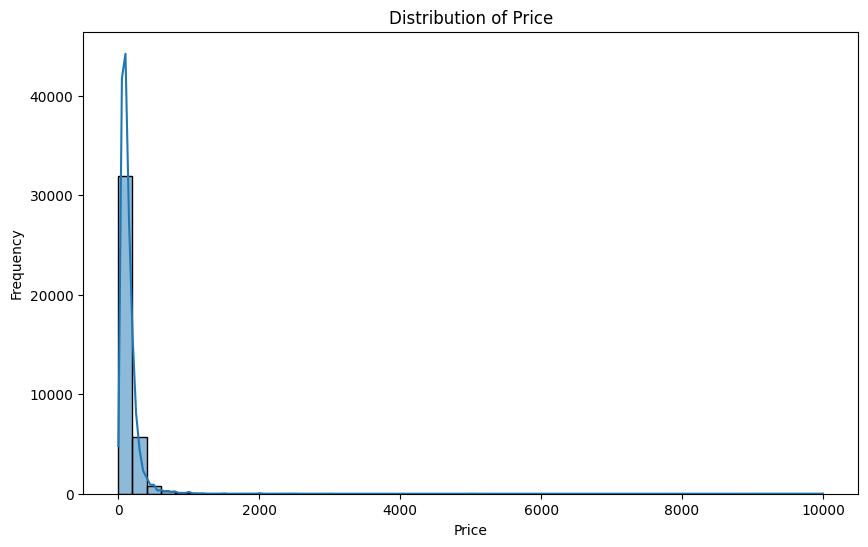

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

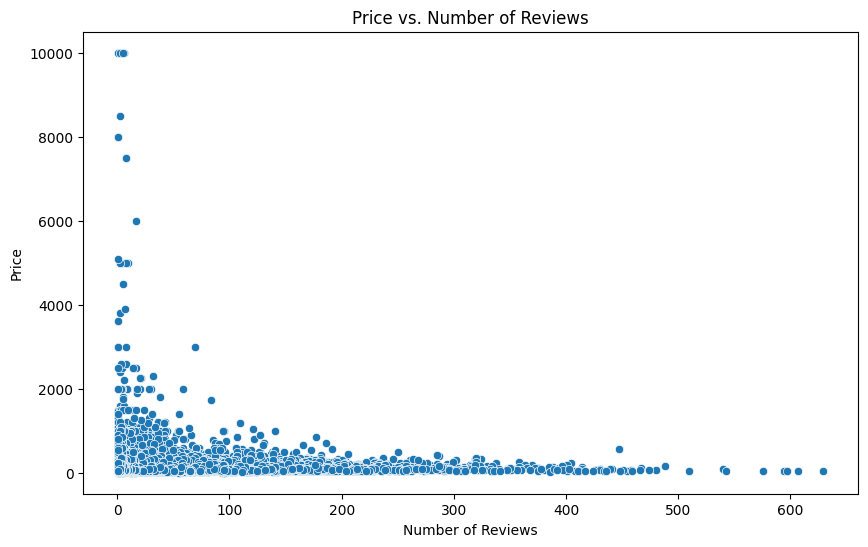

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=df)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

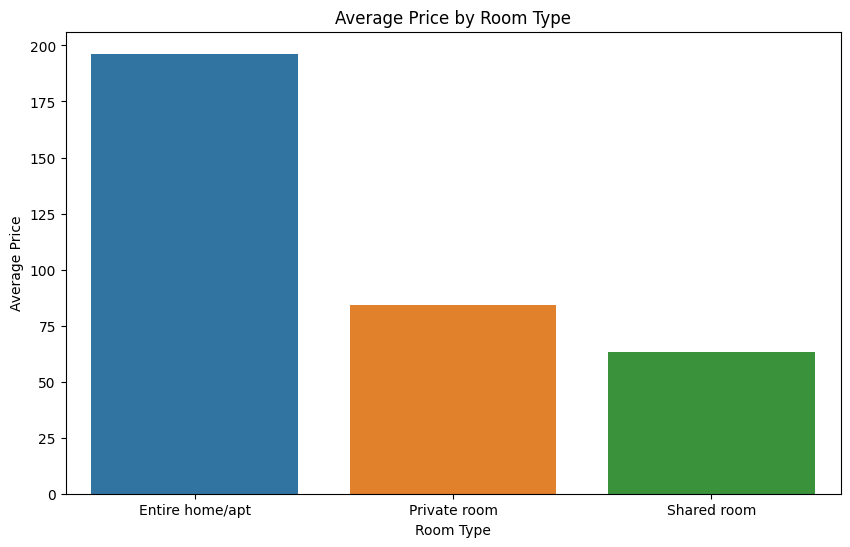

In [19]:
room_type_avg_price = df.groupby('room_type')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', data=room_type_avg_price)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

# Questions & Answers

What is the average price of Airbnb listings in different neighborhoods?

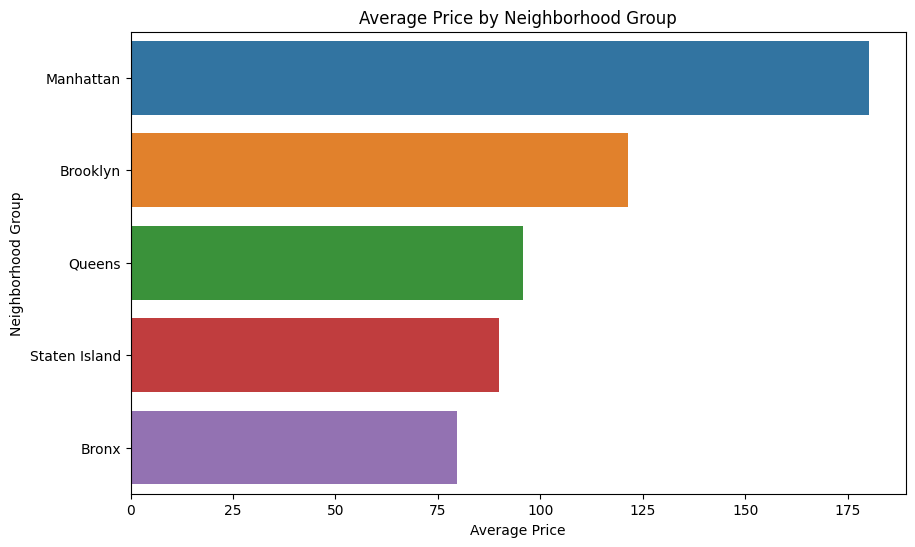

In [20]:
neighborhood_price = df.groupby('neighbourhood_group')['price'].mean().reset_index()
neighborhood_price.sort_values(by='price', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='neighbourhood_group', data=neighborhood_price)
plt.title('Average Price by Neighborhood Group')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood Group')
plt.show()


Which room type is the most common?

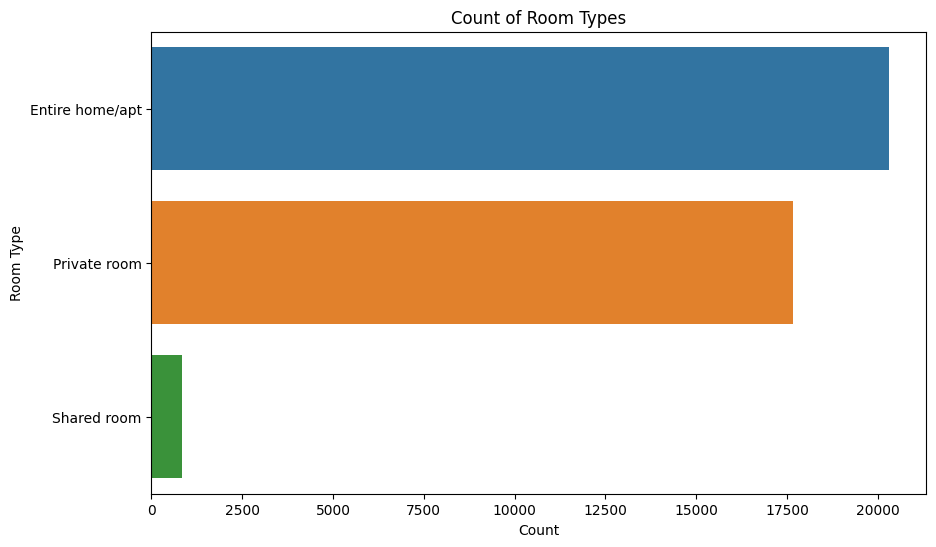

In [21]:
room_type_count = df['room_type'].value_counts().reset_index()
room_type_count.columns = ['room_type', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='room_type', data=room_type_count)
plt.title('Count of Room Types')
plt.xlabel('Count')
plt.ylabel('Room Type')
plt.show()


What is the average number of reviews per month for each neighborhood?

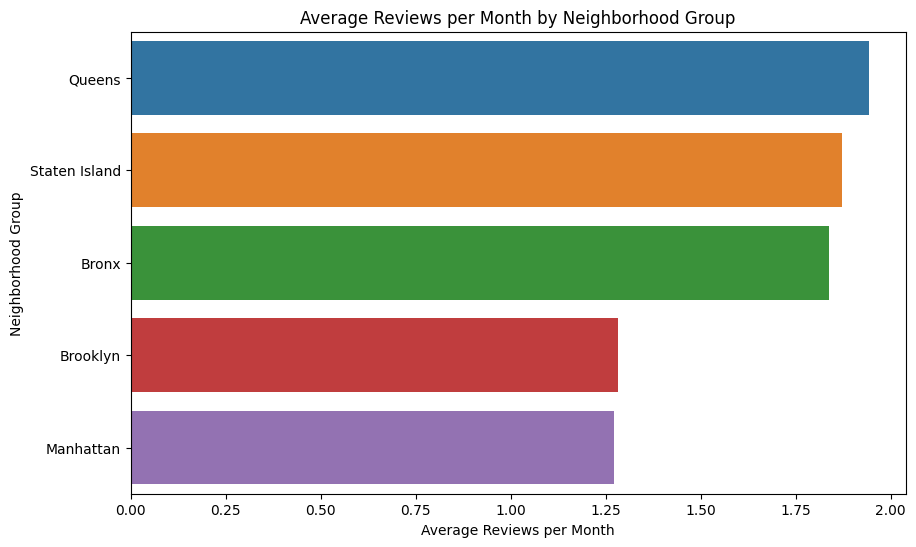

In [22]:
# Average reviews per month per neighborhood
neighborhood_reviews = df.groupby('neighbourhood_group')['reviews_per_month'].mean().reset_index()
neighborhood_reviews.sort_values(by='reviews_per_month', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='reviews_per_month', y='neighbourhood_group', data=neighborhood_reviews)
plt.title('Average Reviews per Month by Neighborhood Group')
plt.xlabel('Average Reviews per Month')
plt.ylabel('Neighborhood Group')
plt.show()


How does the type of room affect the price?

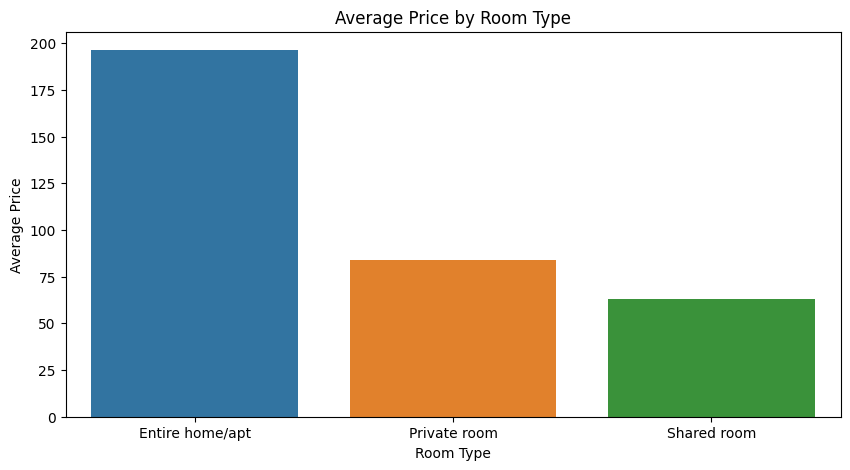

In [23]:
room_type_avg_price = df.groupby('room_type')['price'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='room_type', y='price', data=room_type_avg_price)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

Which neighborhoods have the highest and lowest number of listings?

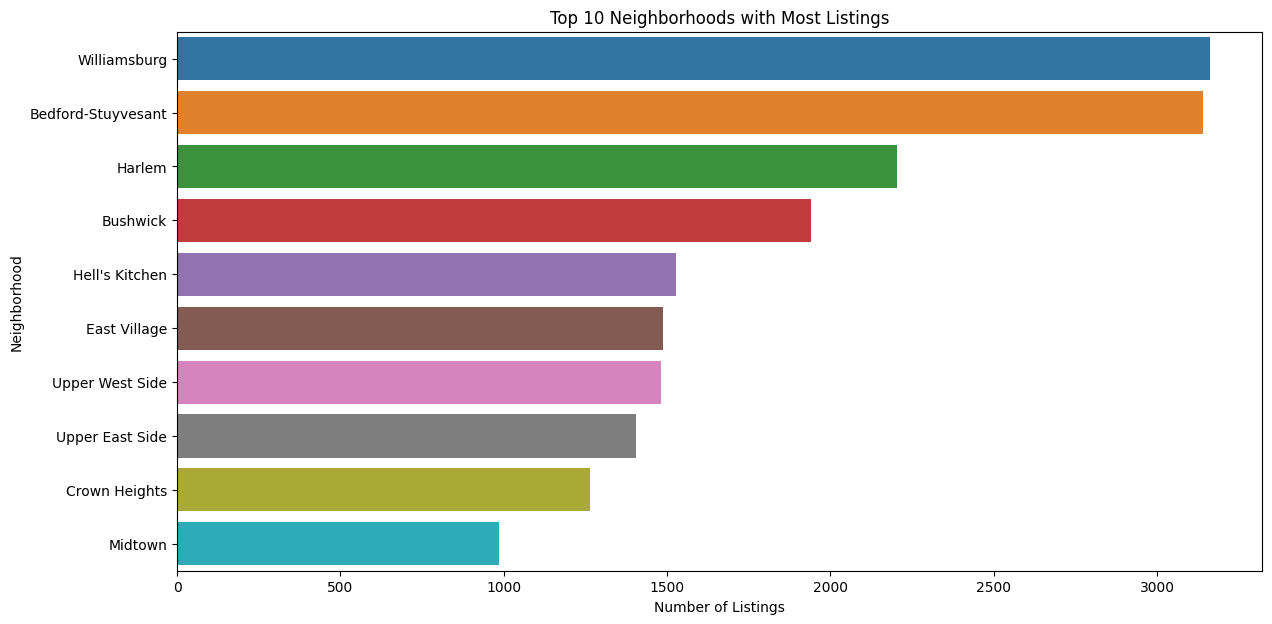

In [24]:
neighborhood_count = df['neighbourhood'].value_counts().reset_index()
neighborhood_count.columns = ['neighbourhood', 'listing_count']

top_neighborhoods = neighborhood_count.head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x='listing_count', y='neighbourhood', data=top_neighborhoods)
plt.title('Top 10 Neighborhoods with Most Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.show()